# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(type(x_train))
print(x_train[0])
print(type(y_train))
print(y_train[0])

<class 'numpy.ndarray'>
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
<class 'numpy.ndarray'>
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])
print(len(x_train[0]))

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [6]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(25000, 2)
(25000, 2)


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 1000)
(25000, 1000)
(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [8]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(1000, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2002      
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 1,003,002
Trainable params: 1,003,002
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [16]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
train_error = []
test_error = []
epochs_range = range(5,55,5)
for epochs in epochs_range:
    model.fit(x_train, y_train, epochs = epochs, verbose = 2, validation_data=(x_test, y_test))
    train_score = model.evaluate(x_train, y_train, verbose=0)
    test_score = model.evaluate(x_test, y_test, verbose=0)
    train_error.append(train_score[1])
    test_error.append(test_score[1])

print(train_error)
print(test_error)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
12s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 2/5
12s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 3/5
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 4/5
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 5/5
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 2/10
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 3/10
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 4/10
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 5/10
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 6/10
13s - loss: 1.1921e-07 - acc: 1.0000 - val_l

13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 20/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 21/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 22/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 23/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 24/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 25/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 26/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 27/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 28/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 29/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 30/30
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.043

13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 9/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 10/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 11/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 12/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 13/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 14/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 15/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 16/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 17/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 18/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434 - val_acc: 0.8608
Epoch 19/45
13s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.0434

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

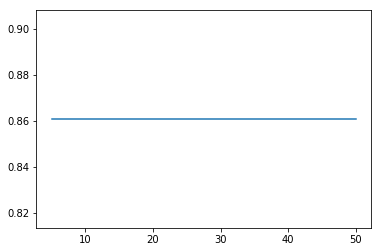

In [17]:
plt.plot(epochs_range, test_error)